Dataset Shape: (299, 13)
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64
Results for No Scaling:
Accuracy: 0.5833333333333334
Confusion Matrix:
[[35  0]
 [25  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.94      0.79        35
           1       0.82      0.36      0.50        25

    accuracy                           0.70        60
   macro avg       0.75      0.65      0.64        60
weighted avg       0.73      0.70      0.67        60

Results for Standard Scaler:
Accuracy: 0.75
Confusion Matrix:
[[33  2]
 [13 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.94      0.79        35
           1       0.82      0.36      0.50        25

    accuracy                           0.70        60
   macro avg       0.75      0.65      0.64        60
weighted avg       0.73      0.70      0.67        60

Results for MinMax Scaler:
Accuracy: 0.7
Confusi

c:\Users\angel\AppData\Local\pypoetry\Cache\virtualenvs\heart-failure-prediction-svm-7gLMnBzH-py3.10\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\angel\AppData\Local\pypoetry\Cache\virtualenvs\heart-failure-prediction-svm-7gLMnBzH-py3.10\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\angel\AppData\Local\pypoetry\Cache\virtualenvs\heart-failure-prediction-svm-7gLMnBzH-py3.10\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined

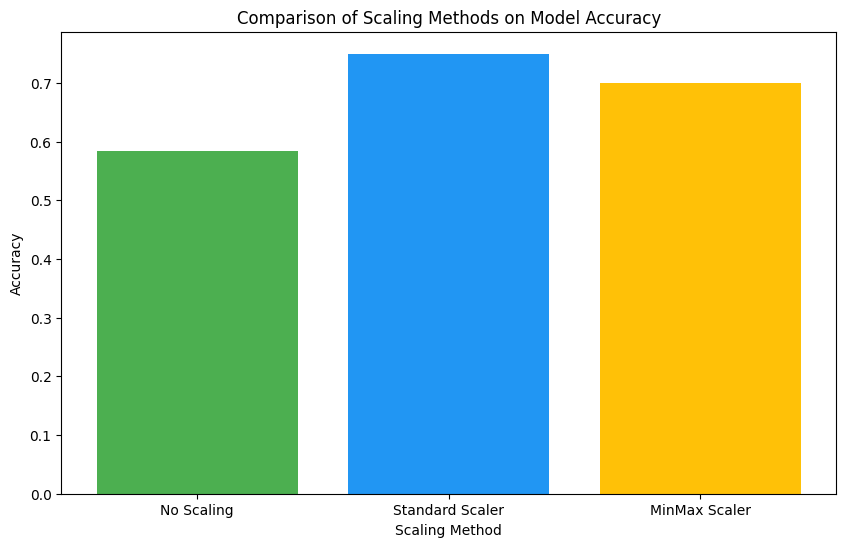

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load Data
HFP_df = pd.read_csv('../data/heart_failure_clinical_records_dataset.csv')
print(f"Dataset Shape: {HFP_df.shape}")

# Separate features and target
X = HFP_df.drop('DEATH_EVENT', axis=1)
y = HFP_df['DEATH_EVENT']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define scalers
scalers = {
    'No Scaling': None,
    'Standard Scaler': StandardScaler(),
    'MinMax Scaler': MinMaxScaler()
}

# Initialize a dictionary to store results
results = {}

# Loop through each scaler and evaluate the model
for scaler_name, scaler in scalers.items():
    # Scale the data if a scaler is defined
    if scaler:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        # If no scaling, use the original data
        X_train_scaled = X_train
        X_test_scaled = X_test

    # Initialize and train the SVM model
    svm_model = SVC(kernel='rbf', random_state=42)
    svm_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = svm_model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Store the results for comparison
    results[scaler_name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }

# Examine class distribution
print(y.value_counts())

# Add the zero_division parameter
for scaler_name, metrics in results.items():
    print(f"Results for {scaler_name}:")
    print(f"Accuracy: {metrics['Accuracy']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    # Set zero_division to avoid warnings
    print(classification_report(y_test, y_pred, zero_division=1))


# Optional: Visualize accuracy comparison
scaler_names = list(results.keys())
accuracies = [results[name]['Accuracy'] for name in scaler_names]

plt.figure(figsize=(10, 6))
plt.bar(scaler_names, accuracies, color=['#4CAF50', '#2196F3', '#FFC107'])
plt.xlabel('Scaling Method')
plt.ylabel('Accuracy')
plt.title('Comparison of Scaling Methods on Model Accuracy')
plt.show()
